This file is to select the MEG data for our paper when considering age and gender balance

Note that I only filter the datasets from Control group

In [1]:
import pandas as pd
import numpy as np 
from scipy.stats import chi2_contingency
import scipy
import os
import matplotlib.pyplot as plt

In [2]:
# the baseline data for the current dataset (88 vs 70)
os.chdir("/home/huaqingj/MyResearch/TVDN-AD/")
ADSum = pd.read_csv("./OtherFils/ADcomplete.csv").loc[:87, :]
CtrlSum = pd.read_excel("./OtherFils/Ctrlcomplete.xlsx")
# RM space in col names
ADSum.columns = ADSum.columns.str.strip()
CtrlSum.columns = CtrlSum.columns.str.strip()

In [3]:
# combine together, only consider age and gender
selCols = ["RID", "Gender", "MEG_Age", "MMSE", "CDR", "CDR_Box"]
ComB = ADSum[selCols].append(CtrlSum[selCols], ignore_index=True)

In [4]:
# the  baseline info for the additional dataset for control
addDatAll = [
["UCSF067",  47, 'Male'], 
["UCSF161",  47, 'Female'],
["UCSF174",  47, 'Male'],
["UCSF310",  47, 'Male'],
["UCSF139",  53, 'Male'],
["UCSF145",  53, 'Male'],
["UCSF130",  54, 'Female'],
["UCSF411",  54, 'Male'],
#["UCSF291",  56, 'Female'],
["UCSF010",  57, 'Male'],
["UCSF011",  58, 'Female'],
["UCSF078",  59, 'Male'],
#["UCSF333",  59, 'Female'],
["UCSF081",  60, 'Female'],
["UCSF012",  42, 'Female'],
["UCSF251",  42, 'Female'],
["UCSF279",  43, 'Female'],
["UCSF003",  44, 'Female'],
["UCSF041",  61, 'Male'],
["UCSF302",  62, 'Female'],
["UCSF403",  62, 'Male'],
["UCSF005",  63, 'Female'],
["UCSF117",  63, 'Male'],
["UCSF294",  63, 'Female'],
#["UCSF313",  63, 'Male']
]
addDatAll = sorted(addDatAll, key=lambda x:int(x[0].split("F")[-1]))

In [5]:
addRIDs = [ix[0] for ix in addDatAll]
addAges = [ix[1] for ix in addDatAll]
addGenders = [ix[2] for ix in addDatAll]
addMMSE = ['NA'] * len(addDatAll)
addCDR = ['NA'] * len(addDatAll)
addCDR_Box = ['NA'] * len(addDatAll)
addDataDF = pd.DataFrame({
    "RID": addRIDs, 
    "MEG_Age": addAges,
    "Gender": addGenders,
    "MMSE": addMMSE,
    "CDR": addCDR,
    "CDR_Box": addCDR_Box
})

In [6]:
# combine additional data with previous datasets
ComBall = ComB.append(addDataDF, ignore_index=True)
ComBall = ComBall.assign(Grp=["AD"]*88+["Ctrl"]*(len(ComBall) -88))
ComBall['Gender'] = ComBall['Gender'].apply(lambda x:x.lower())

### Test balance for all datasets

In [7]:
# Age
datAD = ComBall[ComBall["Grp"]=="AD"]
datCtrl = ComBall[(ComBall["Grp"]=="Ctrl")]
print(scipy.stats.ttest_ind(datAD["MEG_Age"], datCtrl["MEG_Age"], equal_var=False))
ComBall.groupby("Grp").describe()

Ttest_indResult(statistic=-2.230175290687792, pvalue=0.02701445795206704)


MEG_Age                                                               \
       count       mean        std   min        25%        50%        75%   
Grp                                                                         
AD      88.0  62.730682   8.687345  49.0  55.675000  60.700000  68.650000   
Ctrl    92.0  65.944370  10.589452  42.0  59.704393  65.806761  74.292459   

                 
            max  
Grp              
AD    84.300000  
Ctrl  87.576297

In [8]:
#Gender
chi2, pv, _, _ = chi2_contingency(np.array(pd.crosstab(ComBall["Grp"], ComBall["Gender"])))
print(pv)
pd.crosstab(ComBall["Grp"], ComBall["Gender"])

0.8372627232719306


Gender,female,male
Grp,,
AD,53,35
Ctrl,53,39


### Test balance after selecting datasets

In [9]:
# select the dataset 
redDat = ComBall.drop(ComBall[(ComBall["Grp"]=="Ctrl") & (ComBall["MEG_Age"] >=82.18)].index)
# age 
datAD = redDat[redDat["Grp"]=="AD"]
datCtrl = redDat[(redDat["Grp"]=="Ctrl")]
print(scipy.stats.ttest_ind(datAD["MEG_Age"], datCtrl["MEG_Age"], equal_var=False))
redDat.groupby("Grp").describe()

Ttest_indResult(statistic=-1.6625298231039924, pvalue=0.09824074243770109)


MEG_Age                                                              \
       count       mean       std   min        25%        50%        75%   
Grp                                                                        
AD      88.0  62.730682  8.687345  49.0  55.675000  60.700000  68.650000   
Ctrl    88.0  65.074597  9.972223  42.0  59.570959  65.727385  73.222937   

                 
            max  
Grp              
AD    84.300000  
Ctrl  82.170521

In [10]:
# Gender
chi2, pv, _, _ = chi2_contingency(np.array(pd.crosstab(redDat["Grp"], redDat["Gender"])))
print(pv)
pd.crosstab(redDat["Grp"], redDat["Gender"])

0.8781529987468449


Gender,female,male
Grp,,
AD,53,35
Ctrl,51,37


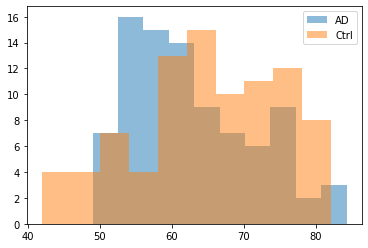

In [11]:
# plot the distribution
plt.hist(redDat[redDat["Grp"]=="AD"]["MEG_Age"], alpha=0.5, label="AD")
plt.hist(redDat[redDat["Grp"]=="Ctrl"]["MEG_Age"], alpha=0.5, label="Ctrl")
plt.legend()

### Save the baseline info

In [12]:
redDat.to_csv("./OtherFils/AllDataSelBaseline.csv", index=False)

In [13]:
from scipy.io import loadmat
RID_AD_labs = loadmat("./OtherFils/radid_AD.mat")["radid"].reshape(-1)
ADlabs = [lab[0].split("A")[0] for lab in RID_AD_labs] 
RID_Ctrl_labs = loadmat("./OtherFils/radid_control.mat")["radid"].reshape(-1)
Ctrllabs = [lab[0].split("A")[0] for lab in RID_Ctrl_labs] 
RID_Ctrl_labs_Add = loadmat("./OtherFils/radid_control_add.mat")["radid"].reshape(-1)
CtrllabsAdd = [lab[0] for lab in RID_Ctrl_labs_Add] 
CtrllabsBoth = Ctrllabs + CtrllabsAdd

In [14]:
import pickle
kpAD = []
for ADlab in ADlabs:
    kpAD.append(np.sum(redDat["RID"] == ADlab))
kpAD = np.array(kpAD)
kpCtrl = []
for Ctrllab in CtrllabsBoth:
    kpCtrl.append(np.sum(redDat["RID"] == Ctrllab))
kpCtrl = np.array(kpCtrl)

kpAll = np.concatenate([kpAD, kpCtrl])

with open("./OtherFils/KpIdxsAll.pkl", "wb") as sf:
    pickle.dump([kpAD, kpCtrl, kpAll], sf)

In [15]:
RIDsAll = np.concatenate([ADlabs, CtrllabsBoth])
mapDF = pd.DataFrame({
    "RID":RIDsAll
})
mapDF = mapDF.reset_index().set_index('RID')
ComBall['idx'] = ComBall['RID'].map(mapDF['index'])
ComBall = ComBall.sort_values("idx")
ComBall["KeepIt"] = np.array(kpAll)

In [16]:
ComBall.to_csv("./OtherFils/AllDataBaselineOrdered.csv", index=False)

### Add features

In [17]:
from pathlib import Path
os.chdir("/home/huaqingj/MyResearch/TVDN-AD")
resDir = Path("./results")
dataDir = Path("./data")

In [18]:
# ecpts
fil = list(resDir.glob("AD_*_ecpts.pkl"))[0]
with open(fil, "rb") as f:
    ecptssAD = pickle.load(f)
fil = list(resDir.glob("Ctrl_*_ecpts.pkl"))[0]
with open(fil, "rb") as f:
    ecptssCtrl = pickle.load(f)

In [19]:
# Eigvals
fil = list(resDir.glob("AD_*_eigVals.pkl"))[0]
with open(fil, "rb") as f:
    eigValsAD = pickle.load(f)
fil = list(resDir.glob("Ctrl_*_eigVals.pkl"))[0]
with open(fil, "rb") as f:
    eigValsCtrl = pickle.load(f)

In [20]:
ncpts = np.concatenate([[len(ix) for ix in ecptssAD],
                        [len(ix) for ix in ecptssCtrl]])
rks = np.concatenate([[len(ix[0]) for ix in eigValsAD],
                        [len(ix[0]) for ix in eigValsCtrl]])

In [21]:
ComBall["ncpts"] = ncpts
ComBall["ranks"] = rks

In [22]:
ComBall.to_csv("./results/AllDataBaselineOrdered_r_ncpt.csv", index=False)